In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:

customers = pd.read_csv("D:/csv file/Customers.csv")
products = pd.read_csv("D:\csv file\Products.csv")
transactions = pd.read_csv("D:\csv file\Transactions.csv")

In [12]:
# Display basic information
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [13]:
# Descriptive statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


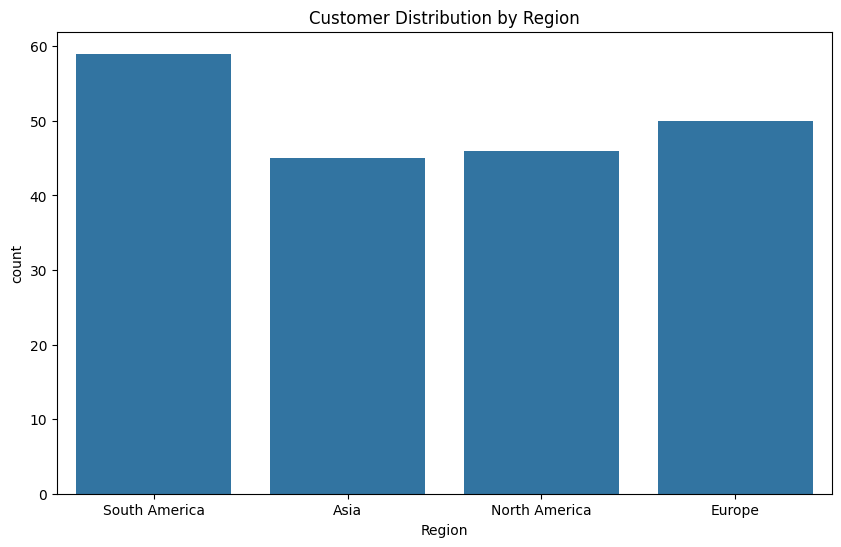

In [14]:
# Customer distribution by region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show()

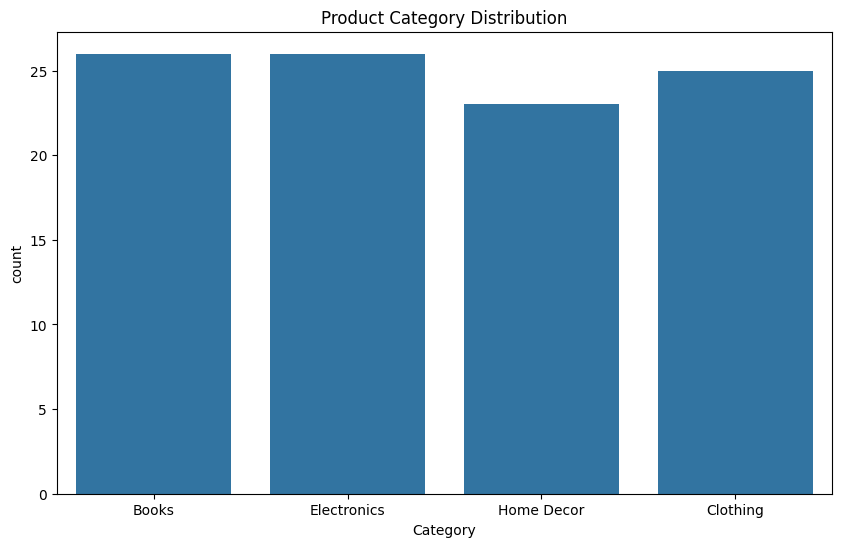

In [15]:
# Product category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=products, x='Category')
plt.title('Product Category Distribution')
plt.show()

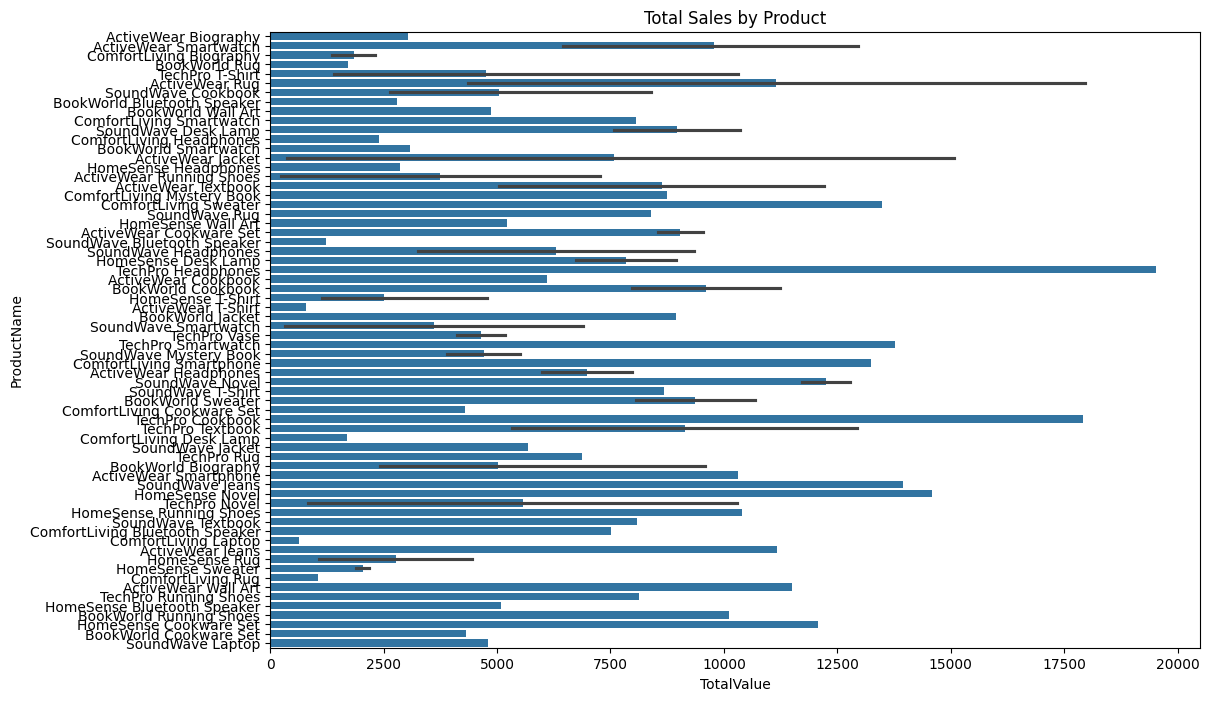

In [16]:
# Total sales by product
total_sales = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()
total_sales = total_sales.merge(products, on='ProductID')
plt.figure(figsize=(12, 8))
sns.barplot(data=total_sales, x='TotalValue', y='ProductName')
plt.title('Total Sales by Product')
plt.show()

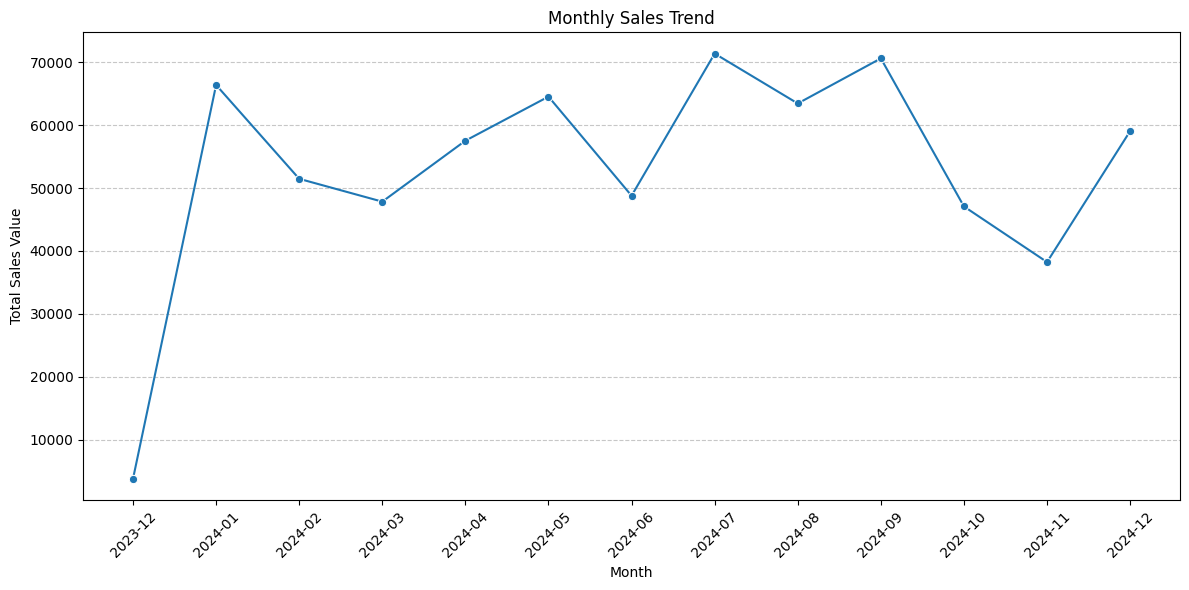

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')


transactions['Month'] = transactions['Month'].astype(str)

monthly_sales = transactions.groupby('Month')['TotalValue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalValue', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
